In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [8]:
data = {'group1': [3, 2, 5, 1, 4, 2, 6, 7, 9, 8],
       'group2': [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]}

df = pd.DataFrame(data)
df.to_csv('./Mann-Whitney-Test_sample_data.csv', index=False)

In [9]:
# 데이터 불러오기
data = pd.read_csv('./Mann-Whitney-Test_sample_data.csv')

In [10]:
# 두 집단 간의 차이 검정
stat, p = mannwhitneyu(data['group1'], data['group2'])

In [11]:
# 결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistic: 32.5
p-value: 0.19622288836173518
Same distribution (fail to reject H0)


C:\Users\bomi\anaconda3\envs\AI\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


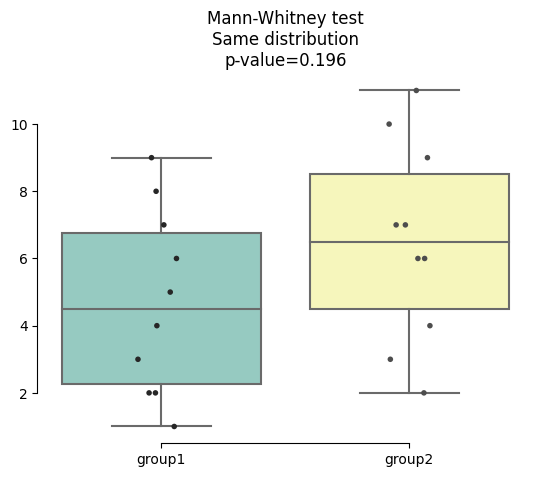

In [12]:
# 검정 결과 시각화
sns.boxplot(data=data[['group1', 'group2']], palette="Set3")
sns.stripplot(data=data[['group1', 'group2']], color='.3', size=4)
sns.despine(trim=True)
if p > 0.05:
    plt.title('Mann-Whitney test\nSame distribution\np-value=%.3f' % (p))
else:
    plt.title('Mann-Whitney test\nDifferent distribution\np-value=%.3f' % (p))
plt.show()

### 맨 휘트니 검정의 등분선상 가정
#### 레빈 검정(Levene's Test)

In [13]:
import pandas as pd
from scipy.stats import levene

In [14]:
# 데이터 불러오기
data = pd.read_csv('./Mann-Whitney-Test_sample_data.csv')
print(data)

   group1  group2
0       3       6
1       2       4
2       5       7
3       1       2
4       4       6
5       2       3
6       6       7
7       7       9
8       9      10
9       8      11


In [15]:
# 등분산성 검정
stat, p = levene(data['group1'], data['group2'])

In [16]:
# 결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Homogeneous variance (fail to reject H0)')
else:
    print('Heterogeneous variance (reject H0)')

Statistic: 0.0
p-value: 1.0
Homogeneous variance (fail to reject H0)


#### 윌콕슨 맨 휘트니 검정 통계량 계산

In [17]:
from scipy.stats import mannwhitneyu

In [18]:
# Example data
group1 = [3, 2, 5, 1, 4, 2, 6, 7, 9, 8]
group2 = [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]

In [20]:
# Calculate Mann-Whitney U statistic and p-value
statistic, p_value = mannwhitneyu(group1, group2)

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 32.5
p-value: 0.19622288836173518


#### 윌콕슨 맨 휘트니 통계량을 이용한 p-value 계산

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy import stats

In [23]:
# 데이터 불러오기
data = pd.read_csv('./Mann-Whitney-Test_sample_data.csv')

In [24]:
# 두 집단 간의 차이 검정
stat, p = mannwhitneyu(data['group1'], data['group2'])

In [25]:
# 두 집단의 크기 계산
n1, n2 = len(data['group1']), len(data['group2'])

In [26]:
# U 값이 클 때는 U 값 대신 (n1 * n2 - U) 값을 사용
if stat > n1 * n2 / 2:
    stat = n1 * n2 - stat

In [27]:
# p-value 계산
p_value = 2 * stats.norm.cdf(-abs(stat) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12))

print('Mann-Whitney U statistic:', stat)
print('p-value:', p_value)

Mann-Whitney U statistic: 32.5
p-value: 0.014019277113959953


#### 맨 휘트니 검정 예시

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

In [29]:
# 랜덤 데이터 생성
np.random.seed(42)
group1 = np.random.normal(loc=6, scale=1.5, size=100)
group2 = np.random.normal(loc=7, scale=1.5, size=100)

In [30]:
# csv 파일로 저장
data = pd.DataFrame({'group1': group1, 'group2': group2})
data.to_csv('./sleep_data.csv', index=False)

In [31]:
# csv 데이터 읽기
data = pd.read_csv('./sleep_data.csv')

group1_data = data['group1']
group2_data = data['group2']

In [32]:
# 맨-휘트니 검정 수행
stat, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')

In [33]:
# 결과 출력
print('Mann-Whitney U statistic:', stat)
print('p-value:', p_value)

Mann-Whitney U statistic: 2834.0
p-value: 1.2154388166891524e-07


In [34]:
# 유의수준 0.05로 가설 검정
if p_value < 0.05:
    print('두 집단 간에는 유의한 차이가 있습니다.')
else:
    print('두 집단 간에는 유의한 차이가 없습니다.')

두 집단 간에는 유의한 차이가 있습니다.
